# E-Commerce Data Analysis
---

In this notebook, we will analyze the sales data of a fictional USA E-commerce superstore. Over the course of our analysis, we will explore the dataset and try to get the answer of the following questions.

1.	What is the monthly sales of the store and identify which months had the highest/ lowest sales.
2.	Sales by product categories and product sub-categories.
4.	Profits by Year.
5.	Profits by Product category and sub-category.
6.	Sales and profits in different customer segment.
7.	Profit Margin.


## -◈◈◈- Table of Contents -◈◈◈- <a class="anchor" id="toc"></a>
* [Importing the Modules](#chapter1)
* [Data Preprocessing](#chapter2)
    * [Data Import and Initial Overview](#section_2_1)
    * [Date-time Conversion](#section_2_2)
* [Monthly Sales Analysis](#chapter3)
    * [Sales by Category](#section_3_1)
    * [Sales by Sub-Category](#section_3_2)
* [Profit Calculations](#chapter4)
    * [Yearly Profit](#section_4_1)
    * [Profits by Category](#section_4_2)
    * [Profits by Sub-Category](#section_4_3)
* [Customer Segment](#chapter5)
    * [Number of Customers over the Segments](#section_5_1)
    * [Sales Contribution by Customer Segment](#section_5_2)
    * [Profit Contribution by Customer Segment](#section_5_3)
    * [Profit Margin by Customer Segments](#section_5_4)

## Importing the Modules <a class="anchor" id="chapter1"></a>
At first we would import all the necessary modules for data analysis.


In [1]:
# importing the necessary modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

Return to [ToC](#toc)

## Data Preprocessing <a id="chapter2"></a>
---
Before creating the visualizations, we need to explore the data.


### Data Import and Initial Overview <a id="section_2_1"></a>
As part of our workflow

- We will import the data
- Have a brief overview (shape, column names, column data types)
- Look at some sample rows

In [2]:
# importing with proper encoding
ecomm_data = pd.read_csv("Data/Sample - Superstore.csv", encoding= "latin-1")   

We are writing a function that gives an overview of the dataset.

In [3]:
def data_overview(data_frame):
    """ This function takes a dataframe and performs some data exploration """

    print("------------ The Dataframe Shape ------------")
    print(data_frame.shape)

    print("\n"*2)

    print("------------ 10 Sample Rows ------------")
    print(data_frame.sample(10))

    print("\n"*2)
    
    print("------------ Column Names, Data Types ------------")
    data_frame.info()

    print("\n"*2)
    
    print("------------ Descriptive Statistics of Numerical Columns ------------")
    print(data_frame.describe())

    print("\n"*2)

    print("------------ Number of Null Values in Columns ------------")
    print(ecomm_data.isnull().sum()) 


In [4]:
# calling the function
data_overview(ecomm_data)

------------ The Dataframe Shape ------------
(9994, 21)



------------ 10 Sample Rows ------------
      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
3198    3199  CA-2014-131527   12/1/2014   12/7/2014  Standard Class   
8577    8578  CA-2017-146164  12/22/2017  12/26/2017  Standard Class   
1511    1512  CA-2017-100384   6/24/2017    7/1/2017  Standard Class   
5341    5342  CA-2015-146486   11/9/2015  11/14/2015    Second Class   
2495    2496  CA-2014-136644   6/16/2014   6/22/2014  Standard Class   
4729    4730  CA-2016-124681   7/18/2016   7/23/2016    Second Class   
9545    9546  CA-2014-166590  10/29/2014   11/2/2014  Standard Class   
45        46  CA-2016-118255   3/11/2016   3/13/2016     First Class   
6729    6730  CA-2015-156734   6/18/2015   6/20/2015     First Class   
9721    9722  CA-2016-105781   2/16/2016   2/20/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country           City  \
3198    TB-21280   Toby Bra

Gladly, we do not have any null values.

Return to [ToC](#toc)

### Date-time Conversion <a id="section_2_2"></a>
This dataset has two columns containing dates, 'Order Date' and 'Ship Date'. But they are not in date-time format. Now we will convert them to perform proper time intelligence calculations.

In [5]:
ecomm_data["Order Date"] = pd.to_datetime(ecomm_data["Order Date"])     # type conversion
ecomm_data["Ship Date"] = pd.to_datetime(ecomm_data["Ship Date"])

ecomm_data.info()                                                       # recheck

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
# creating new calculated columns 
ecomm_data["Order Month"] = ecomm_data["Order Date"].dt.month
ecomm_data["Order Year"] = ecomm_data["Order Date"].dt.year
ecomm_data["Order Day of Week"] = ecomm_data["Order Date"].dt.day_of_week

ecomm_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


Return to [ToC](#toc)

## Monthly Sales Analysis <a id="chapter3"></a>
---
Let us now see the sales by month. Remember, this dataset describes data for 4 years. But we will do aggregations by month for all the years.

In [7]:
sales_by_month = ecomm_data.groupby("Order Month")["Sales"].sum().reset_index()     # the Dataframe
sales_by_month["Sales"] = round(sales_by_month["Sales"]/1000, 2)                    # In Thousands USD

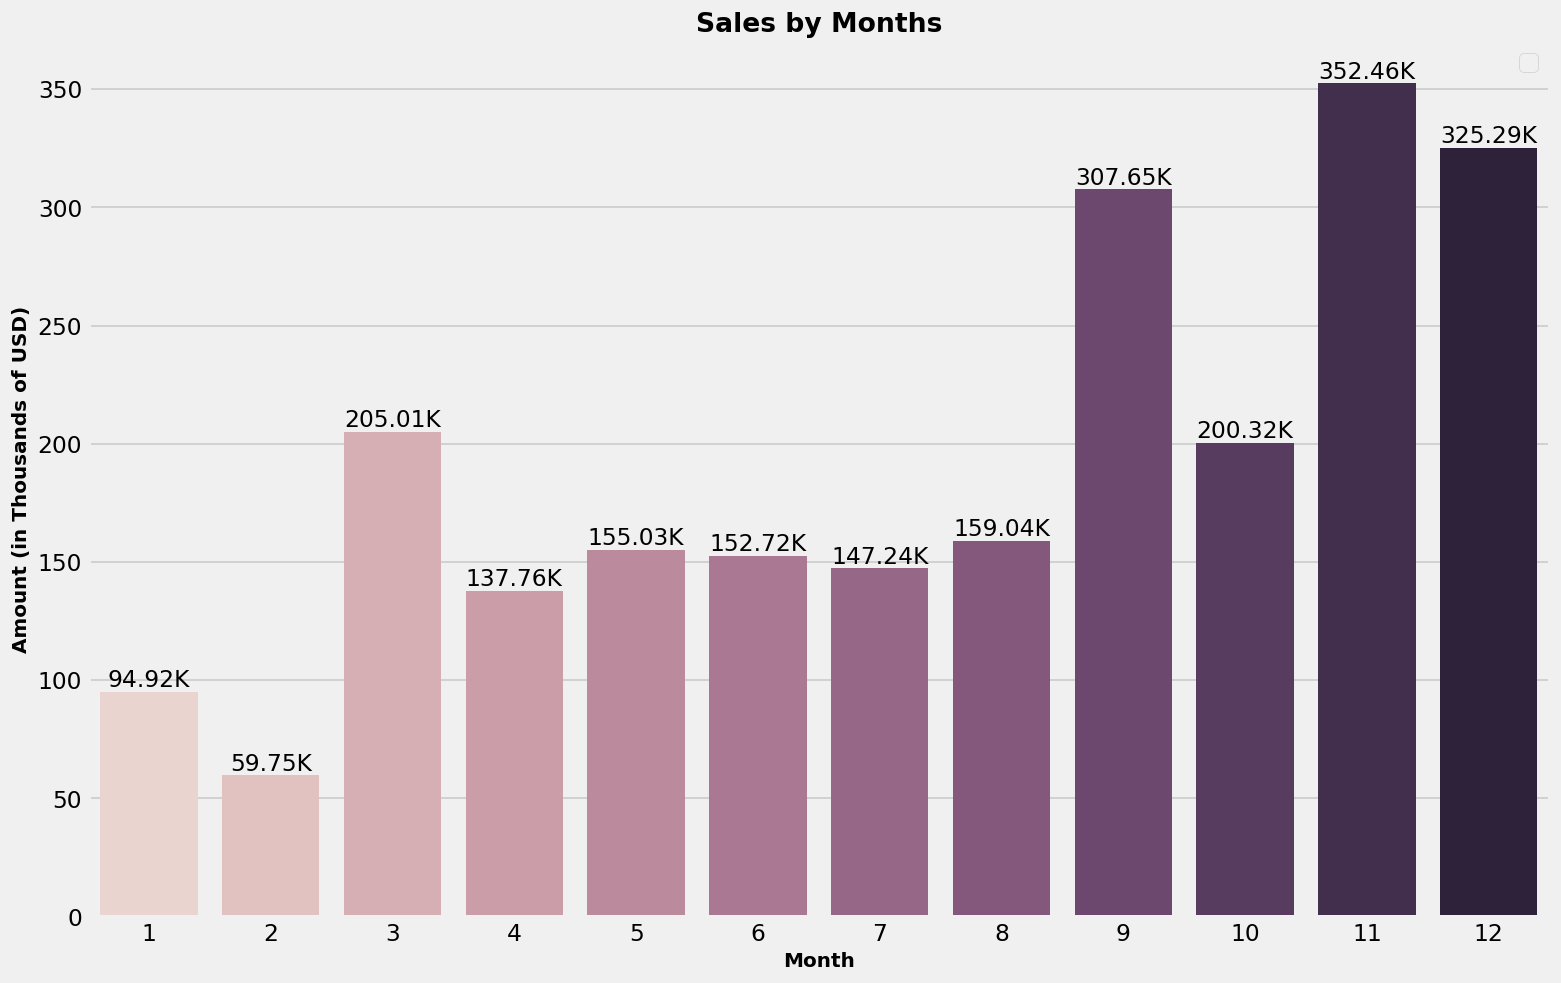

In [8]:
# ----------------- Initiating figure object -----------------
plt.figure(figsize=(14,9),dpi=120)

# ----------------- Main Plot -----------------
ax = sns.barplot(data = sales_by_month, x = "Order Month", y= "Sales",\
                   hue = "Order Month")

# ----------------- Title, Labels, Legend etc ----------------
plt.title('Sales by Months',fontsize = 16, weight='bold')
plt.xlabel('Month',fontsize = 12, weight='bold')
plt.ylabel('Amount (in Thousands of USD)',fontsize = 12, weight='bold')
plt.legend('')

# annotation
for container in ax.containers:
    ax.bar_label(container,fmt='%0.2fK')

# ------------------------------------------------------------- 
plt.show()

So across all the years the month of january had the lowest sale 94.92K USD (in total) and the month of November had the highest sale 352.46K USD (in total).

Return to [ToC](#toc)

### Sales by Category <a id="section_3_1"></a>
Now we will see the amount of sales across all product categories and sub-categories.

In [9]:
# the aggregated Dataframe
sales_by_category = ecomm_data.groupby("Category")["Sales"].sum().sort_values(ascending=False).reset_index()   

sales_by_category["Sales"] = round(sales_by_category["Sales"]/1000, 2)      # In thousands of USD

As we have only three categories, a pie chart will suffice.

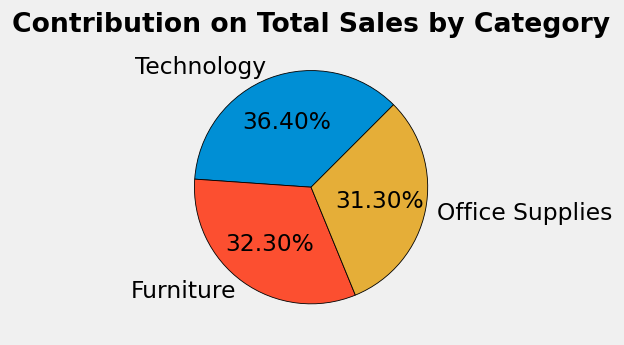

In [10]:
# ----------------- Initiating figure object -----------------
plt.figure(figsize=(3,3),dpi=120)

# ----------------- Pie Chart -----------------
plt.pie(sales_by_category["Sales"], labels= sales_by_category["Category"],\
        wedgeprops={"edgecolor":"black"}, startangle = 45, autopct="%0.2f%%")

plt.title("Contribution on Total Sales by Category",fontsize = 16, weight='bold')
# ------------------------------------------------------------
plt.show()

So the Technology product category has the highest contribution on total sales by amount (36.4 %). And the Office Supplies category has the least amount of sales (31.3%). What about seeing them by the amount of sales revenue ? Lets see a bar chart.

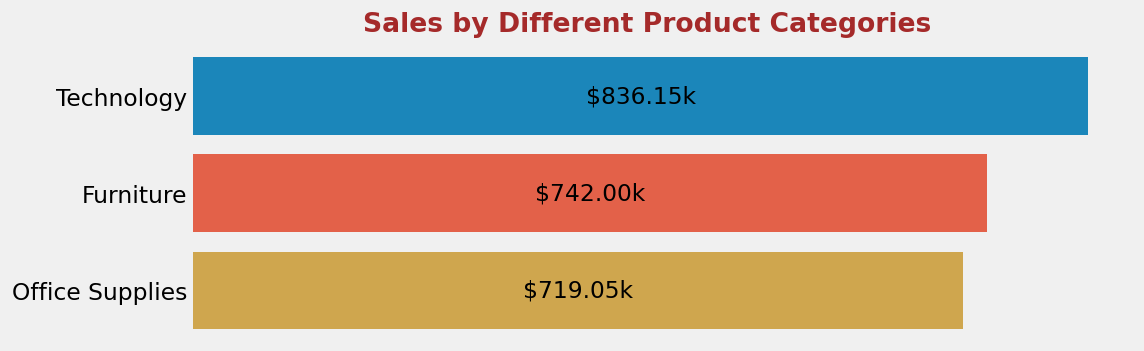

In [11]:
plt.figure(figsize=(9,3),dpi=120)
# ------------------------------ main plot ------------------------------ 
ax = sns.barplot(data = sales_by_category, x = "Sales", y = "Category",\
                 hue = "Category")              # bar plot

# ------------------------------ labeliing, beautification ------------------------------ 
plt.suptitle('Sales by Different Product Categories',fontsize = 16, color="brown", weight='bold')
plt.xlabel("") ; plt.xticks([]); 
plt.ylabel(""); 
plt.box(False);                                        # Removes the frame

# data annotation
for container in ax.containers:
    ax.bar_label(container,label_type="center",fmt='$%0.2fk')
# ------------------------------ Shows the canvas ------------------------------ 
plt.show()

### Sales by Sub-Category <a id="section_3_2"></a>
Now we will see the same things for the subcategories

In [12]:
# aggregation
sales_by_subcat = ecomm_data.groupby("Sub-Category")["Sales"].sum().sort_values(ascending= False).reset_index()
sales_by_subcat["Sales"] = round(sales_by_subcat["Sales"]/1000,2)        # in thousands of USD

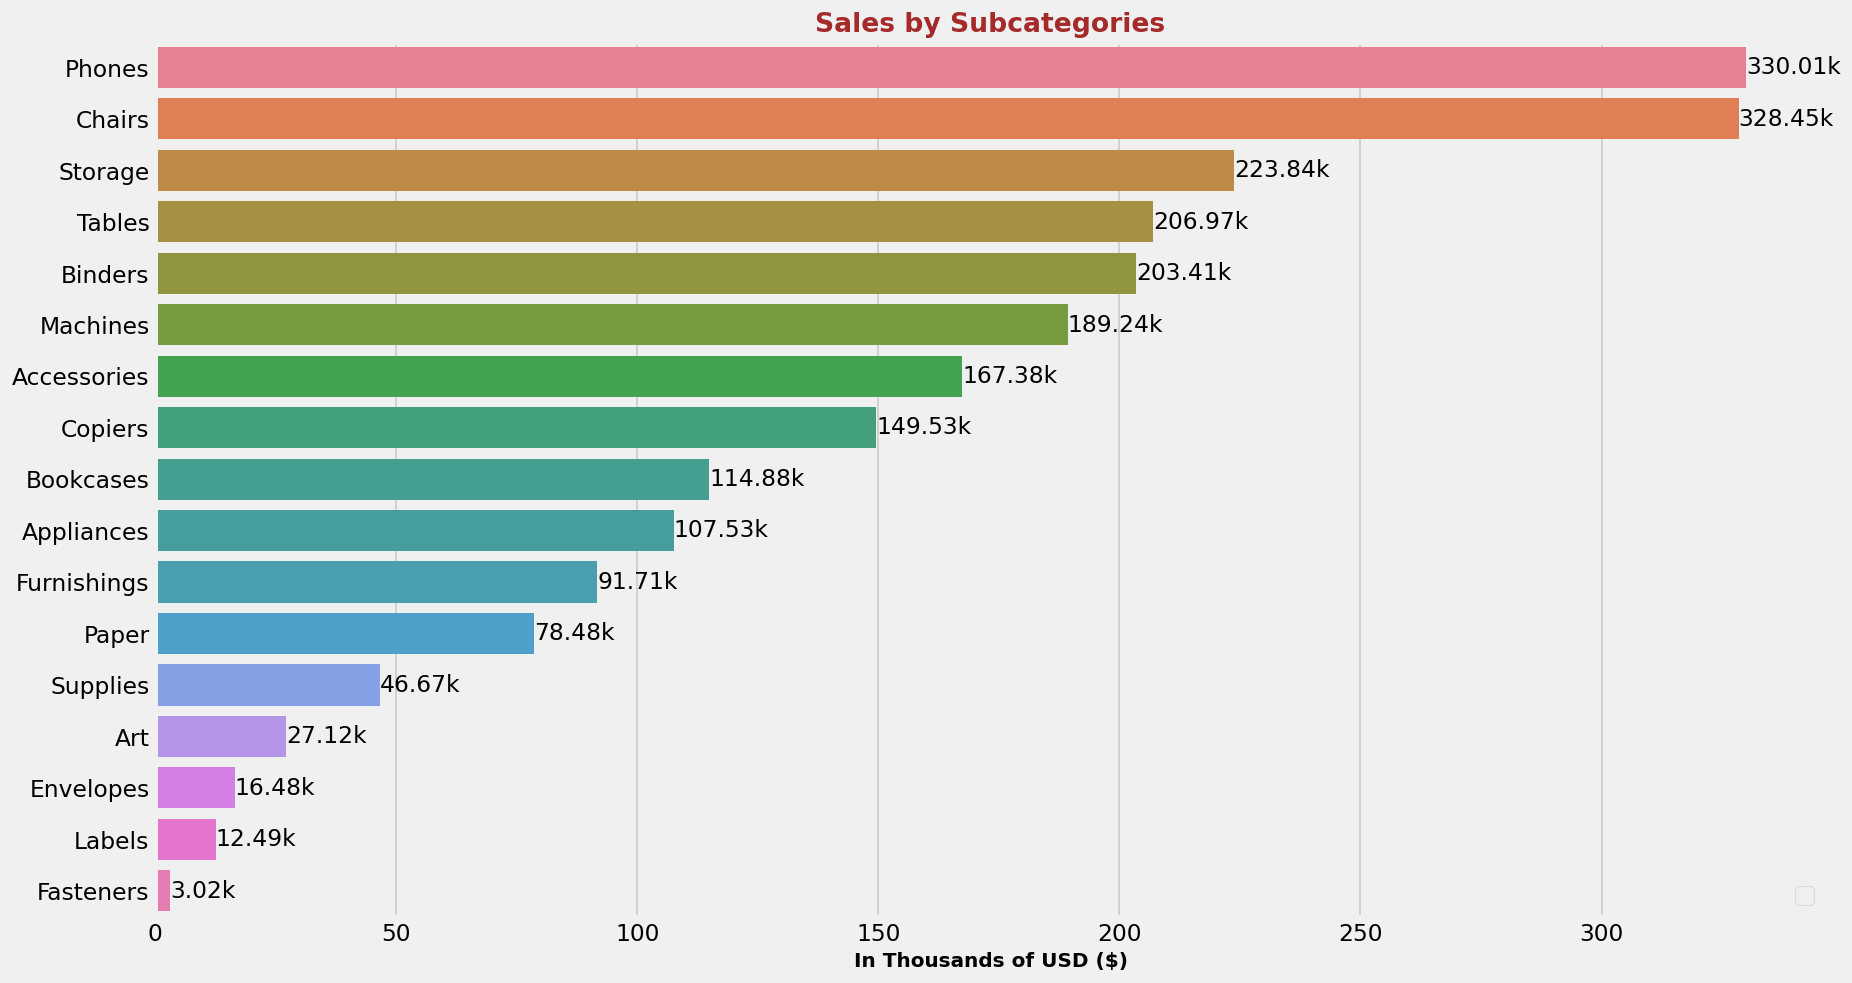

In [13]:
# ----------------- Initiating figure object -----------------
plt.figure(figsize=(16,9),dpi=120)

# ----------------- Main Plot -----------------
ax = sns.barplot(data = sales_by_subcat, x = "Sales", y= "Sub-Category",\
                   hue = "Sub-Category")

# ----------------- Title, Labels, Legend etc ----------------
plt.title('Sales by Subcategories',fontsize = 16, color= 'Brown',weight='bold')
plt.xlabel('In Thousands of USD ($)',fontsize = 12, weight='bold')
plt.ylabel("")
plt.legend('')

# annotation
for container in ax.containers:
    ax.bar_label(container,fmt='%0.2fk')

# ------------------------------------------------------------- 
plt.show()

So, considering the sales amount - Phones have made the highest amount (330.01K USD) and Fasteners made the least amount (3.02K USD).

Return to [ToC](#toc)

## Profit Calculations <a id="chapter4"></a>
---
Look at the months by the profit and find out which months had the highest/ lowest profits. Here two things are to be noted.

- The amount of profit (Aggregated by Year/ Categories/ Sub-Categories/ Products)
- Profit Margin (Profit Amount divided by the Sales Amount)

So we need to perform mutiple aggregations per groupby.

### Yearly Profit <a id="section_4_1"></a>
At first we will look at the amount of profits made over the years.

In [14]:
# Profit Over the Years
profit_over_years = ecomm_data.groupby("Order Year").agg(\
    Total_Sales= ("Sales", 'sum'),Total_Profit = ("Profit", 'sum')\
         ).reset_index()

# Profit Percentage
profit_over_years["Total_Profit_Perct"] = \
    round((profit_over_years["Total_Profit"]/profit_over_years["Total_Sales"])*100,2)

Now lets plot it.

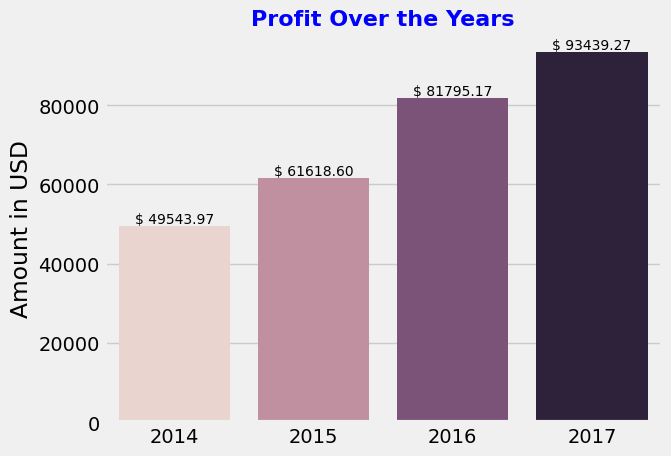

In [15]:
ax = sns.barplot(data = profit_over_years, x = "Order Year", y= "Total_Profit", \
            hue = "Order Year", legend = False)

# ----------------------------  Labeling/ Beautification ----------------------------------------
plt.title('Profit Over the Years',fontsize = 16, color= "b", weight='bold')
plt.xlabel("") ; plt.ylabel("Amount in USD") ; 

# data values annotation
for container in ax.containers:
    ax.bar_label(container,fmt='$ %0.2f',fontsize = 10)

plt.show()

Return to [ToC](#toc)

### Profits by Category <a id="section_4_2"></a>
At first we will look at the contribution % of each category over the total profit.

In [16]:
# the aggregation
profit_by_category = ecomm_data.groupby("Category")["Profit"].sum().sort_values(ascending=False).reset_index()

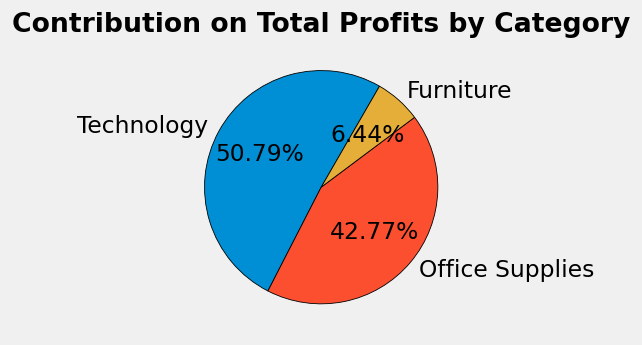

In [17]:
# ----------------- Initiating figure object -----------------
plt.figure(figsize=(3,3),dpi=120)

# ----------------- Pie Chart -----------------
plt.pie(profit_by_category["Profit"], labels= profit_by_category["Category"],\
        wedgeprops={"edgecolor":"black"}, startangle = 60, autopct="%0.2f%%")

plt.title("Contribution on Total Profits by Category",fontsize = 16, weight='bold')

# ------------------------------------------------------------
plt.show()

So the Furnitures make the least contribution to overall profits (6.44%), while the technology category makes the highest amount of contribution (50.79%). Recall, by sales amount the Furnitures take the second place.

Return to [ToC](#toc)

### Profits by Sub-Category <a id="section_4_3"></a>
Now we will see all the subcategories by the profit percentage. It will show which products are the most profitable and which are not.

In [18]:
# Profit by Sub Categories
profit_by_subcat = ecomm_data.groupby("Sub-Category").agg(\
    Total_Sales= ("Sales", 'sum'),Total_Profit = ("Profit", 'sum')\
         )

# Profit Percentage
profit_by_subcat["Total_Profit_Perct"] = \
    round((profit_by_subcat["Total_Profit"]/profit_by_subcat["Total_Sales"])*100,2)

# Sort by Profit Percentage 
profit_by_subcat = profit_by_subcat.sort_values(["Total_Profit_Perct"], ascending = False)

Now lets plot it.

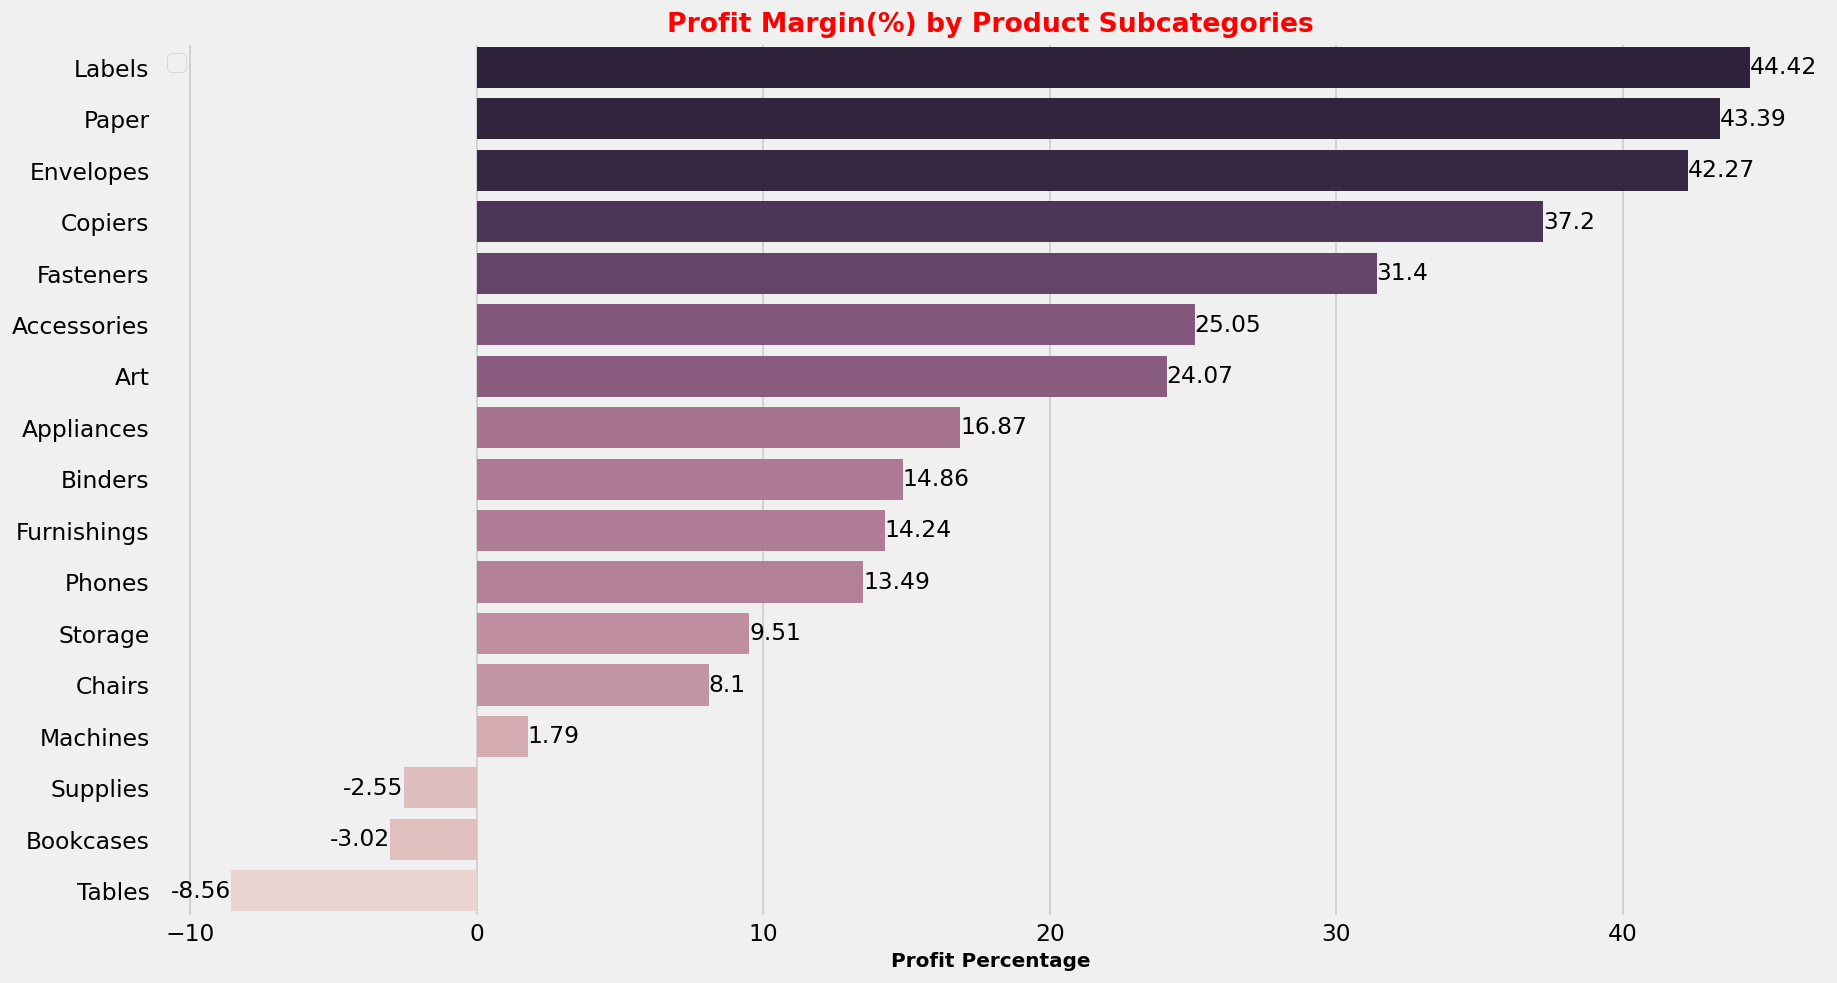

In [19]:
# ----------------- Initiating figure object -----------------
plt.figure(figsize=(16,9),dpi=120)

# ----------------- Main Plot -----------------
ax = sns.barplot(data = profit_by_subcat, x = "Total_Profit_Perct", y= "Sub-Category",\
                   hue = "Total_Profit_Perct")

# ----------------- Title, Labels, Legend etc ----------------
plt.title('Profit Margin(%) by Product Subcategories',fontsize = 16, color= 'Red',weight='bold')
plt.xlabel('Profit Percentage',fontsize = 12, weight='bold')
plt.ylabel("")
plt.legend('')

# annotation
for container in ax.containers:
    ax.bar_label(container)

# ------------------------------------------------------------- 
plt.show()

So Labels, Papers and Envelops make the most amount of profit. And the business is losing money on Supplies, Bookcases and Tables.

Return to [ToC](#toc)

## Customer Segment <a id="chapter5"></a>
---
Now let us look at the customers. We will analyze - 

- Number of Unique customers on each segment
- Sales by customer segment
- Profits by customer segment
- Profit margin by customer segment

We will plot several charts to show the analysis.

In [20]:
# aggregation
customer_groups_sales = ecomm_data.groupby("Segment").agg(\
    Num_Customer = ("Customer ID","nunique"), Total_Sales= ("Sales", 'sum'),Total_Profit = ("Profit", 'sum')\
         ).reset_index()

# Profit Percentage
customer_groups_sales["Total_Profit_Perct"] = \
    round((customer_groups_sales["Total_Profit"]/customer_groups_sales["Total_Sales"])*100,2)

### Number of Customers over the Segments <a id="section_5_1"></a>
Let us see how many customers are there on each segment.

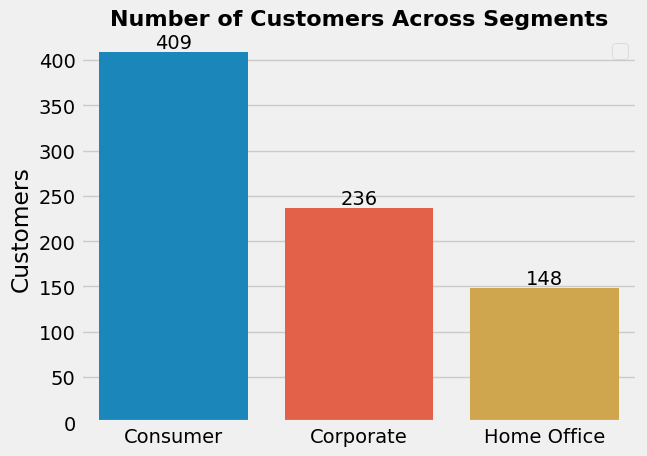

In [21]:
# ----------------- Main Plot -----------------
ax = sns.barplot(data = customer_groups_sales, x = "Segment", y= "Num_Customer",\
                   hue = "Segment")
# ----------------- Title, Labels, Legend etc ----------------
plt.title('Number of Customers Across Segments',fontsize = 16, color= 'k', weight='bold')
plt.xlabel("")
plt.ylabel("Customers")
plt.legend('')

# annotation
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Return to [ToC](#toc)

### Sales Contribution by Customer Segment <a id="section_5_2"></a>
Let us see the % contribution of each customer segment on the total sales.

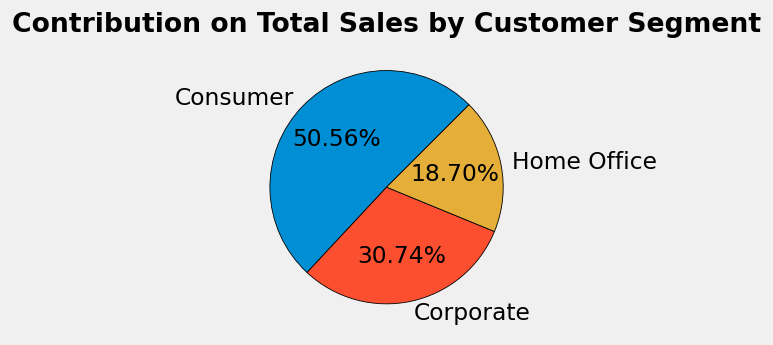

In [22]:
# ----------------- Initiating figure object -----------------
plt.figure(figsize=(3,3),dpi=120)

# ----------------- Pie Chart -----------------
plt.pie(x = customer_groups_sales ["Total_Sales"], labels= customer_groups_sales ["Segment"],\
        wedgeprops={"edgecolor":"black"}, startangle = 45, autopct="%0.2f%%")

plt.title("Contribution on Total Sales by Customer Segment",fontsize = 16, weight='bold')

# ------------------------------------------------------------
plt.show()

So in terms contribution % on the totals sales amount, Consumer is the biggest segment (50.56%) and Home Office is the smalllest segment (18.70%).

Return to [ToC](#toc)

### Profit Contribution by Customer Segment <a id="section_5_3"></a>
Now let's check the contribution of the customer segments over the total profit.

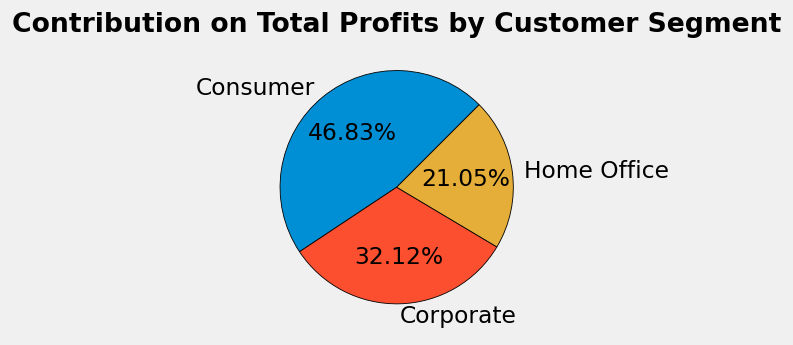

In [23]:
# ----------------- Initiating figure object -----------------
plt.figure(figsize=(3,3),dpi=120)

# ----------------- Pie Chart -----------------
plt.pie(x = customer_groups_sales ["Total_Profit"], labels= customer_groups_sales ["Segment"],\
        wedgeprops={"edgecolor":"black"}, startangle = 45, autopct="%0.2f%%")

plt.title("Contribution on Total Profits by Customer Segment",fontsize = 16, weight='bold')

# ------------------------------------------------------------
plt.show()

So you can see that although the Home Office segment contributes to the least amount of total sales (18.07%), it makes 21.05% of the whole profits. Does it mean that selling in this segment is most profitable ? We will see.

Return to [ToC](#toc)

### Profit Margin by Customer Segments <a id="section_5_4"></a>
Now we see the profit margin on individual customer segments.

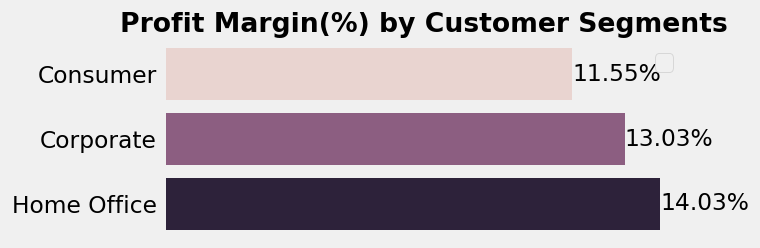

In [24]:
# ----------------- Initiating figure object -----------------
plt.figure(figsize=(5,2),dpi=120)
# ----------------- Main Plot -----------------
ax = sns.barplot(data = customer_groups_sales, x = "Total_Profit_Perct", y= "Segment",\
                   hue = "Total_Profit_Perct")

# ----------------- Title, Labels, Legend etc ----------------
plt.title('Profit Margin(%) by Customer Segments',fontsize = 16, color= 'k',weight='bold')
plt.xlabel("") ; plt.xticks([]),
plt.ylabel("") ; 
plt.legend('')

# annotation
for container in ax.containers:
    ax.bar_label(container, fmt='%0.2f%%')

# ------------------------------------------------------------- 
plt.show()

So the business in making highest amount of profit (14.03%) by selling products in the home office segment.

Return to [ToC](#toc)